In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import os

In [14]:
print(os.path.join(os.pardir,'malaria_data','training.json'))

../malaria_data/training.json


In [16]:
with open(os.path.join('..','malaria_data','training.json')) as f:
    data = json.load(f)

In [20]:
# create empty dictionary with column names as keys
cells_df = {
    'path':[],
    'min_r':[],
    'min_c':[],
    'max_r':[],
    'max_c':[],
    'r_len':[],
    'c_len':[],
    'category':[]
}

# run a first for loop to get each image from list
for image in data:
    
#     run a nested loop withing each image to get the individual object data

    #Populate cells_df dict with bounding box data
    for box in image['objects']:
        cells_df['path'].append(image['image']['pathname'])
        cells_df['min_r'].append(box['bounding_box']['minimum']['r'])
        cells_df['min_c'].append(box['bounding_box']['minimum']['c'])
        cells_df['max_r'].append(box['bounding_box']['maximum']['r'])
        cells_df['max_c'].append(box['bounding_box']['maximum']['c'])
        cells_df['r_len'].append(box['bounding_box']['maximum']['r']-box['bounding_box']['minimum']['r'])
        cells_df['c_len'].append(box['bounding_box']['maximum']['c']-box['bounding_box']['minimum']['c'])
        cells_df['category'].append(box['category'])

# create dataframe using pandas  

training_json_df = pd.DataFrame(cells_df)
print(training_json_df)
print(type(training_json_df))
training_json_df


                                                   path  min_r  min_c  max_r  \
0      /images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png   1057   1440   1158   
1      /images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png    868   1303    971   
2      /images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png    578    900    689   
3      /images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png    304    611    408   
4      /images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png    198    881    312   
...                                                 ...    ...    ...    ...   
80108  /images/99e979d4-ee97-4d7f-9da6-00bead40db4d.png    757    520    873   
80109  /images/99e979d4-ee97-4d7f-9da6-00bead40db4d.png    308    808    406   
80110  /images/99e979d4-ee97-4d7f-9da6-00bead40db4d.png    510    453    595   
80111  /images/99e979d4-ee97-4d7f-9da6-00bead40db4d.png      0   1260     87   
80112  /images/99e979d4-ee97-4d7f-9da6-00bead40db4d.png    740      0    852   

       max_c  r_len  c_len        categ

,path,min_r,min_c,max_r,max_c,r_len,c_len,category
0,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,1057,1440,1158,1540,101,100,red blood cell
1,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,868,1303,971,1403,103,100,red blood cell
2,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,578,900,689,1008,111,108,red blood cell
3,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,304,611,408,713,104,102,red blood cell
4,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,198,881,312,1003,114,122,red blood cell
...,...,...,...,...,...,...,...,...
80108,/images/99e979d4-ee97-4d7f-9da6-00bead40db4d.png,757,520,873,595,116,75,red blood cell
80109,/images/99e979d4-ee97-4d7f-9da6-00bead40db4d.png,308,808,406,900,98,92,trophozoite
80110,/images/99e979d4-ee97-4d7f-9da6-00bead40db4d.png,510,453,595,570,85,117,red blood cell
80111,/images/99e979d4-ee97-4d7f-9da6-00bead40db4d.png,0,1260,87,1344,87,84,red blood cell


In [4]:
# Size analysis (80113)

training_json_df['box_area'] = training_json_df['c_len']*training_json_df['r_len']
training_json_df['c_by_r'] = training_json_df['c_len']/training_json_df['r_len']
training_json_df['r_by_c'] = training_json_df['r_len']/training_json_df['c_len']

training_json_df.head()

,path,min_r,min_c,max_r,max_c,r_len,c_len,category,box_area,c_by_r,r_by_c
0,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,1057,1440,1158,1540,101,100,red blood cell,10100,0.990099,1.010000
1,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,868,1303,971,1403,103,100,red blood cell,10300,0.970874,1.030000
2,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,578,900,689,1008,111,108,red blood cell,11988,0.972973,1.027778
3,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,304,611,408,713,104,102,red blood cell,10608,0.980769,1.019608
4,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,198,881,312,1003,114,122,red blood cell,13908,1.070175,0.934426


In [5]:
training_json_df.describe()

,min_r,min_c,max_r,max_c,r_len,c_len,box_area,c_by_r,r_by_c
count,80113.000000,80113.000000,80113.000000,80113.000000,80113.000000,80113.000000,80113.000000,80113.000000,80113.000000
mean,544.956412,745.531075,653.112416,854.426772,108.156005,108.895697,11881.209716,1.018884,1.004572
std,317.907257,432.921602,317.935921,432.967210,15.729066,15.660231,2919.680426,0.160322,0.157348
min,0.000000,0.000000,60.000000,69.000000,53.000000,54.000000,3933.000000,0.290323,0.309524
25%,270.000000,369.000000,378.000000,479.000000,98.000000,99.000000,9800.000000,0.932203,0.918919
50%,545.000000,745.000000,653.000000,854.000000,107.000000,108.000000,11655.000000,1.008475,0.991597
75%,820.000000,1120.000000,927.000000,1229.000000,118.000000,118.000000,13685.000000,1.088235,1.072727
max,1129.000000,1531.000000,1200.000000,1600.000000,255.000000,250.000000,52020.000000,3.230769,3.444444


In [6]:
# number of perfect squares (2821)

no_squares = training_json_df.query('c_by_r == 1.000000')
no_squares

,path,min_r,min_c,max_r,max_c,r_len,c_len,category,box_area,c_by_r,r_by_c
10,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,755,1326,862,1433,107,107,red blood cell,11449,1.0,1.0
23,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,150,178,263,291,113,113,red blood cell,12769,1.0,1.0
34,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,706,532,823,649,117,117,red blood cell,13689,1.0,1.0
55,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,357,1100,455,1198,98,98,red blood cell,9604,1.0,1.0
82,/images/10be6380-cbbb-4886-8b9e-ff56b1710576.png,451,721,555,825,104,104,red blood cell,10816,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
80022,/images/38d1b930-dd97-4248-9160-e9389a1a8dd7.png,102,305,228,431,126,126,red blood cell,15876,1.0,1.0
80023,/images/38d1b930-dd97-4248-9160-e9389a1a8dd7.png,136,1381,247,1492,111,111,red blood cell,12321,1.0,1.0
80031,/images/38d1b930-dd97-4248-9160-e9389a1a8dd7.png,29,809,129,909,100,100,red blood cell,10000,1.0,1.0
80035,/images/38d1b930-dd97-4248-9160-e9389a1a8dd7.png,356,1306,456,1406,100,100,red blood cell,10000,1.0,1.0


<Axes: xlabel='box_area', ylabel='Count'>

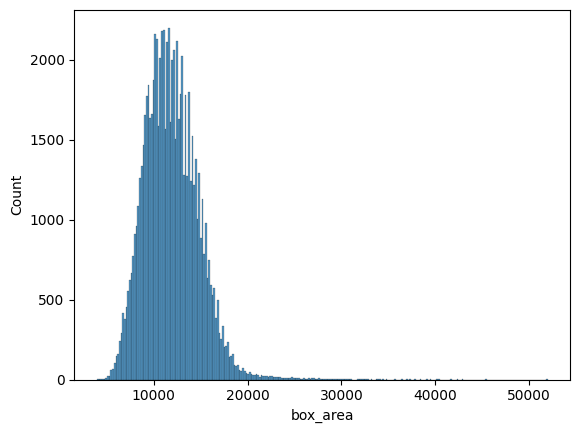

In [7]:
sns.histplot(data=training_json_df, x='box_area')

<Axes: xlabel='c_by_r', ylabel='Count'>

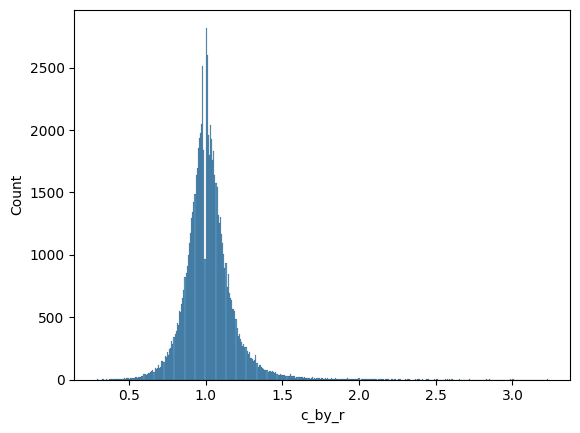

In [8]:
sns.histplot(data=training_json_df, x='c_by_r')

<Axes: xlabel='r_by_c', ylabel='Count'>

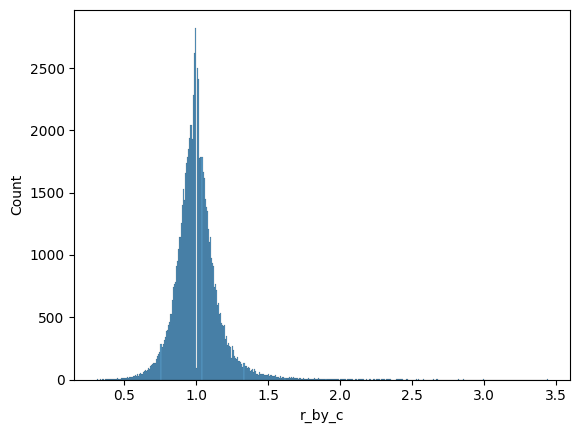

In [9]:
sns.histplot(data=training_json_df, x='r_by_c')

In [10]:
# filtering dataframe eliminating to rectangle-y bounding boxes (70942 left)

square_enough = training_json_df.query('0.75 <= r_by_c <= 1.25 and 0.75 <= c_by_r <= 1.25')
square_enough

,path,min_r,min_c,max_r,max_c,r_len,c_len,category,box_area,c_by_r,r_by_c
0,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,1057,1440,1158,1540,101,100,red blood cell,10100,0.990099,1.010000
1,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,868,1303,971,1403,103,100,red blood cell,10300,0.970874,1.030000
2,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,578,900,689,1008,111,108,red blood cell,11988,0.972973,1.027778
3,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,304,611,408,713,104,102,red blood cell,10608,0.980769,1.019608
4,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,198,881,312,1003,114,122,red blood cell,13908,1.070175,0.934426
...,...,...,...,...,...,...,...,...,...,...,...
80106,/images/99e979d4-ee97-4d7f-9da6-00bead40db4d.png,194,771,296,895,102,124,red blood cell,12648,1.215686,0.822581
80107,/images/99e979d4-ee97-4d7f-9da6-00bead40db4d.png,1026,929,1130,1036,104,107,red blood cell,11128,1.028846,0.971963
80109,/images/99e979d4-ee97-4d7f-9da6-00bead40db4d.png,308,808,406,900,98,92,trophozoite,9016,0.938776,1.065217
80111,/images/99e979d4-ee97-4d7f-9da6-00bead40db4d.png,0,1260,87,1344,87,84,red blood cell,7308,0.965517,1.035714


In [11]:
# filtering out very large bounding boxes (70828 left)

square_enough_and_good_size = square_enough.query('box_area <= 25000')
square_enough_and_good_size

,path,min_r,min_c,max_r,max_c,r_len,c_len,category,box_area,c_by_r,r_by_c
0,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,1057,1440,1158,1540,101,100,red blood cell,10100,0.990099,1.010000
1,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,868,1303,971,1403,103,100,red blood cell,10300,0.970874,1.030000
2,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,578,900,689,1008,111,108,red blood cell,11988,0.972973,1.027778
3,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,304,611,408,713,104,102,red blood cell,10608,0.980769,1.019608
4,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,198,881,312,1003,114,122,red blood cell,13908,1.070175,0.934426
...,...,...,...,...,...,...,...,...,...,...,...
80106,/images/99e979d4-ee97-4d7f-9da6-00bead40db4d.png,194,771,296,895,102,124,red blood cell,12648,1.215686,0.822581
80107,/images/99e979d4-ee97-4d7f-9da6-00bead40db4d.png,1026,929,1130,1036,104,107,red blood cell,11128,1.028846,0.971963
80109,/images/99e979d4-ee97-4d7f-9da6-00bead40db4d.png,308,808,406,900,98,92,trophozoite,9016,0.938776,1.065217
80111,/images/99e979d4-ee97-4d7f-9da6-00bead40db4d.png,0,1260,87,1344,87,84,red blood cell,7308,0.965517,1.035714


In [12]:
square_enough_and_good_size['category'].value_counts()

red blood cell    68931
trophozoite         993
difficult           310
ring                305
gametocyte          107
schizont            105
leukocyte            77
Name: category, dtype: int64

In [13]:
# # removing labelled leukocytes

# square_enough_good_size_no_leukocytes = square_enough_and_good_size.drop(square_enough_and_good_size[square_enough_and_good_size['category'] == 'leukocyte'].index)
# square_enough_good_size_no_leukocytes

In [14]:
square_enough_and_good_size['category'].value_counts(normalize=True)

red blood cell    0.973217
trophozoite       0.014020
difficult         0.004377
ring              0.004306
gametocyte        0.001511
schizont          0.001482
leukocyte         0.001087
Name: category, dtype: float64

In [15]:
square_enough_and_good_size['category'].value_counts()

red blood cell    68931
trophozoite         993
difficult           310
ring                305
gametocyte          107
schizont            105
leukocyte            77
Name: category, dtype: int64

In [17]:
square_enough_and_good_size.describe()

,min_r,min_c,max_r,max_c,r_len,c_len,box_area,c_by_r,r_by_c
count,70828.000000,70828.000000,70828.000000,70828.000000,70828.000000,70828.000000,70828.000000,70828.000000,70828.000000
mean,545.667420,746.158257,653.581437,854.590459,107.914017,108.432202,11831.803157,1.009686,0.999671
std,317.839873,432.495779,317.855421,432.556097,13.668024,13.542877,2738.025083,0.097336,0.096776
min,0.000000,0.000000,70.000000,69.000000,57.000000,60.000000,3933.000000,0.800000,0.800000
25%,270.000000,371.000000,379.000000,480.000000,98.000000,99.000000,9810.000000,0.941176,0.930693
50%,546.000000,746.000000,653.000000,855.000000,108.000000,108.000000,11655.000000,1.008000,0.992063
75%,821.000000,1119.000000,928.000000,1228.000000,117.000000,118.000000,13673.000000,1.074468,1.062500
max,1129.000000,1531.000000,1200.000000,1600.000000,173.000000,174.000000,24963.000000,1.250000,1.250000


In [19]:
square_enough_and_good_size.to_csv('cleaned_training_json_size_square.csv', index=False)

In [ ]:
#